In [58]:
import fastf1 as ff1
from fastf1.core import Laps

import fastf1.plotting

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


from timple.timedelta import strftimedelta


from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection



In [35]:
session = ff1.get_session(2022,10, 'Q') ### Picking up Silverstone Data

In [36]:
session.load(); ## Loading the session


core           INFO 	Loading data for British Grand Prix - Qualifying [v2.2.8]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['55', '1', '16', '11', '44', '4', '14', '63', '24', '6', '10', '77', '22', '3', '31', '23', '20', '5', '47', '18']


In [23]:
silverstone_df = silverstone_session.results

In [24]:
silverstone_df

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,1.0,0.0,0 days 00:01:40.190000,0 days 00:01:41.602000,0 days 00:01:40.983000,NaT,,0.0
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,2.0,0.0,0 days 00:01:39.129000,0 days 00:01:40.655000,0 days 00:01:41.055000,NaT,,0.0
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,3.0,0.0,0 days 00:01:39.846000,0 days 00:01:41.247000,0 days 00:01:41.298000,NaT,,0.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,4.0,0.0,0 days 00:01:40.521000,0 days 00:01:42.513000,0 days 00:01:41.616000,NaT,,0.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,5.0,0.0,0 days 00:01:40.428000,0 days 00:01:41.062000,0 days 00:01:41.995000,NaT,,0.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,6.0,0.0,0 days 00:01:41.515000,0 days 00:01:41.821000,0 days 00:01:42.084000,NaT,,0.0
14,14,F ALONSO,ALO,Alpine,2293d1,Fernando,Alonso,Fernando Alonso,7.0,0.0,0 days 00:01:41.598000,0 days 00:01:42.209000,0 days 00:01:42.116000,NaT,,0.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,8.0,0.0,0 days 00:01:40.028000,0 days 00:01:41.725000,0 days 00:01:42.161000,NaT,,0.0
24,24,G ZHOU,ZHO,Alfa Romeo,b12039,Guanyu,Zhou,Guanyu Zhou,9.0,0.0,0 days 00:01:40.791000,0 days 00:01:42.640000,0 days 00:01:42.719000,NaT,,0.0
6,6,N LATIFI,LAT,Williams,37bedd,Nicholas,Latifi,Nicholas Latifi,10.0,0.0,0 days 00:01:41.998000,0 days 00:01:43.273000,0 days 00:02:03.095000,NaT,,0.0


In [37]:
session.laps.info()

<class 'fastf1.core.Laps'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                392 non-null    timedelta64[ns]
 1   DriverNumber        392 non-null    object         
 2   LapTime             342 non-null    timedelta64[ns]
 3   LapNumber           392 non-null    int64          
 4   Stint               392 non-null    int64          
 5   PitOutTime          57 non-null     timedelta64[ns]
 6   PitInTime           55 non-null     timedelta64[ns]
 7   Sector1Time         345 non-null    timedelta64[ns]
 8   Sector2Time         391 non-null    timedelta64[ns]
 9   Sector3Time         391 non-null    timedelta64[ns]
 10  Sector1SessionTime  345 non-null    timedelta64[ns]
 11  Sector2SessionTime  391 non-null    timedelta64[ns]
 12  Sector3SessionTime  391 non-null    timedelta64[ns]
 13  SpeedI1             371 non-null    float64   

In [38]:
drivers = pd.unique(silverstone_session.laps['Driver'])
print(drivers)

['SAI' 'VER' 'LEC' 'PER' 'HAM' 'NOR' 'ALO' 'RUS' 'ZHO' 'LAT' 'GAS' 'BOT'
 'TSU' 'RIC' 'OCO' 'ALB' 'MAG' 'VET' 'MSC' 'STR']


In [52]:
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)

    
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

In [48]:
#fastest_laps =pd.DataFrame(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

In [53]:
fastest_laps

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:15:33.813000,55,0 days 00:01:40.983000,24,3,NaT,NaT,0 days 00:00:32.090000,0 days 00:00:40.617000,0 days 00:00:28.276000,...,True,INTERMEDIATE,8.0,True,0 days 01:13:52.830000,Ferrari,SAI,2,True,2022-07-02 14:58:52.839
1,0 days 01:14:08.877000,1,0 days 00:01:41.055000,21,3,NaT,NaT,0 days 00:00:31.748000,0 days 00:00:40.979000,0 days 00:00:28.328000,...,True,INTERMEDIATE,7.0,True,0 days 01:12:27.822000,Red Bull Racing,VER,1,True,2022-07-02 14:57:27.831
2,0 days 01:13:59.325000,16,0 days 00:01:41.298000,23,3,NaT,NaT,0 days 00:00:32.088000,0 days 00:00:40.712000,0 days 00:00:28.498000,...,True,INTERMEDIATE,7.0,True,0 days 01:12:18.027000,Ferrari,LEC,1,True,2022-07-02 14:57:18.036
3,0 days 01:16:28.335000,11,0 days 00:01:41.616000,25,4,NaT,NaT,NaT,0 days 00:00:40.950000,0 days 00:00:28.397000,...,True,INTERMEDIATE,8.0,True,0 days 01:14:46.716000,Red Bull Racing,PER,2,False,2022-07-02 14:59:46.725
4,0 days 01:16:10.874000,44,0 days 00:01:41.995000,22,3,NaT,NaT,0 days 00:00:32.369000,0 days 00:00:41.106000,0 days 00:00:28.520000,...,True,INTERMEDIATE,8.0,True,0 days 01:14:28.879000,Mercedes,HAM,2,True,2022-07-02 14:59:28.888
5,0 days 00:34:05.868000,23,0 days 00:01:42.078000,10,2,NaT,NaT,0 days 00:00:32.277000,0 days 00:00:41.487000,0 days 00:00:28.314000,...,True,INTERMEDIATE,5.0,True,0 days 00:32:23.790000,Williams,ALB,1,True,2022-07-02 14:17:23.799
6,0 days 01:14:21.316000,4,0 days 00:01:42.084000,24,3,NaT,NaT,0 days 00:00:32.300000,0 days 00:00:41.285000,0 days 00:00:28.499000,...,True,INTERMEDIATE,7.0,True,0 days 01:12:39.232000,McLaren,NOR,1,True,2022-07-02 14:57:39.241
7,0 days 01:14:56.945000,14,0 days 00:01:42.116000,22,4,NaT,NaT,0 days 00:00:31.900000,0 days 00:00:41.404000,0 days 00:00:28.812000,...,True,INTERMEDIATE,9.0,False,0 days 01:13:14.829000,Alpine,ALO,1,True,2022-07-02 14:58:14.838
8,0 days 00:34:01.704000,20,0 days 00:01:42.159000,10,2,NaT,NaT,0 days 00:00:32.243000,0 days 00:00:41.401000,0 days 00:00:28.515000,...,True,INTERMEDIATE,NaN,True,0 days 00:32:19.545000,Haas F1 Team,MAG,1,True,2022-07-02 14:17:19.554
9,0 days 01:16:14.383000,63,0 days 00:01:42.161000,22,3,NaT,NaT,0 days 00:00:32.238000,0 days 00:00:41.164000,0 days 00:00:28.759000,...,True,INTERMEDIATE,8.0,True,0 days 01:14:32.222000,Mercedes,RUS,2,True,2022-07-02 14:59:32.231


In [55]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

In [56]:
fastest_laps

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,LapTimeDelta
0,0 days 01:15:33.813000,55,0 days 00:01:40.983000,24,3,NaT,NaT,0 days 00:00:32.090000,0 days 00:00:40.617000,0 days 00:00:28.276000,...,INTERMEDIATE,8.0,True,0 days 01:13:52.830000,Ferrari,SAI,2,True,2022-07-02 14:58:52.839,0 days 00:00:00
1,0 days 01:14:08.877000,1,0 days 00:01:41.055000,21,3,NaT,NaT,0 days 00:00:31.748000,0 days 00:00:40.979000,0 days 00:00:28.328000,...,INTERMEDIATE,7.0,True,0 days 01:12:27.822000,Red Bull Racing,VER,1,True,2022-07-02 14:57:27.831,0 days 00:00:00.072000
2,0 days 01:13:59.325000,16,0 days 00:01:41.298000,23,3,NaT,NaT,0 days 00:00:32.088000,0 days 00:00:40.712000,0 days 00:00:28.498000,...,INTERMEDIATE,7.0,True,0 days 01:12:18.027000,Ferrari,LEC,1,True,2022-07-02 14:57:18.036,0 days 00:00:00.315000
3,0 days 01:16:28.335000,11,0 days 00:01:41.616000,25,4,NaT,NaT,NaT,0 days 00:00:40.950000,0 days 00:00:28.397000,...,INTERMEDIATE,8.0,True,0 days 01:14:46.716000,Red Bull Racing,PER,2,False,2022-07-02 14:59:46.725,0 days 00:00:00.633000
4,0 days 01:16:10.874000,44,0 days 00:01:41.995000,22,3,NaT,NaT,0 days 00:00:32.369000,0 days 00:00:41.106000,0 days 00:00:28.520000,...,INTERMEDIATE,8.0,True,0 days 01:14:28.879000,Mercedes,HAM,2,True,2022-07-02 14:59:28.888,0 days 00:00:01.012000
5,0 days 00:34:05.868000,23,0 days 00:01:42.078000,10,2,NaT,NaT,0 days 00:00:32.277000,0 days 00:00:41.487000,0 days 00:00:28.314000,...,INTERMEDIATE,5.0,True,0 days 00:32:23.790000,Williams,ALB,1,True,2022-07-02 14:17:23.799,0 days 00:00:01.095000
6,0 days 01:14:21.316000,4,0 days 00:01:42.084000,24,3,NaT,NaT,0 days 00:00:32.300000,0 days 00:00:41.285000,0 days 00:00:28.499000,...,INTERMEDIATE,7.0,True,0 days 01:12:39.232000,McLaren,NOR,1,True,2022-07-02 14:57:39.241,0 days 00:00:01.101000
7,0 days 01:14:56.945000,14,0 days 00:01:42.116000,22,4,NaT,NaT,0 days 00:00:31.900000,0 days 00:00:41.404000,0 days 00:00:28.812000,...,INTERMEDIATE,9.0,False,0 days 01:13:14.829000,Alpine,ALO,1,True,2022-07-02 14:58:14.838,0 days 00:00:01.133000
8,0 days 00:34:01.704000,20,0 days 00:01:42.159000,10,2,NaT,NaT,0 days 00:00:32.243000,0 days 00:00:41.401000,0 days 00:00:28.515000,...,INTERMEDIATE,NaN,True,0 days 00:32:19.545000,Haas F1 Team,MAG,1,True,2022-07-02 14:17:19.554,0 days 00:00:01.176000
9,0 days 01:16:14.383000,63,0 days 00:01:42.161000,22,3,NaT,NaT,0 days 00:00:32.238000,0 days 00:00:41.164000,0 days 00:00:28.759000,...,INTERMEDIATE,8.0,True,0 days 01:14:32.222000,Mercedes,RUS,2,True,2022-07-02 14:59:32.231,0 days 00:00:01.178000


In [59]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    team_colors.append(color)

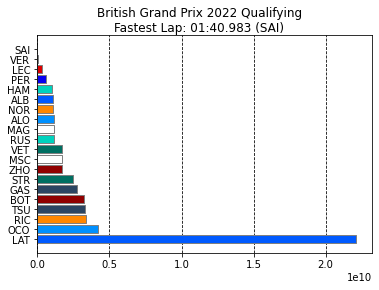

In [77]:
fig, ax = plt.subplots()

ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)


lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()


#### Sainz clocked the fastest lap with 8 laps old tyre, followed by Verstappen and Leclerc.



In [94]:
import matplotlib as mpl


In [109]:
year = 2022
wknd = 10
ses = 'Q'
driver = 'SAI'
colormap = mpl.cm.magma

In [110]:
session = ff1.get_session(year, wknd, ses)
weekend = session.event
session.load()
lap = session.laps.pick_driver(driver).pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']  

core           INFO 	Loading data for British Grand Prix - Qualifying [v2.2.8]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['55', '1', '16', '11', '44', '4', '14', '63', '24', '6', '10', '77', '22', '3', '31', '23', '20', '5', '47', '18']


In [111]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\fastf1\events.py:650: FutureWarning: The `Weekend.name` property is deprecated and will beremoved in a future version.
Use `Event['EventName']` or `Event.EventName` instead.
  warnings.warn(


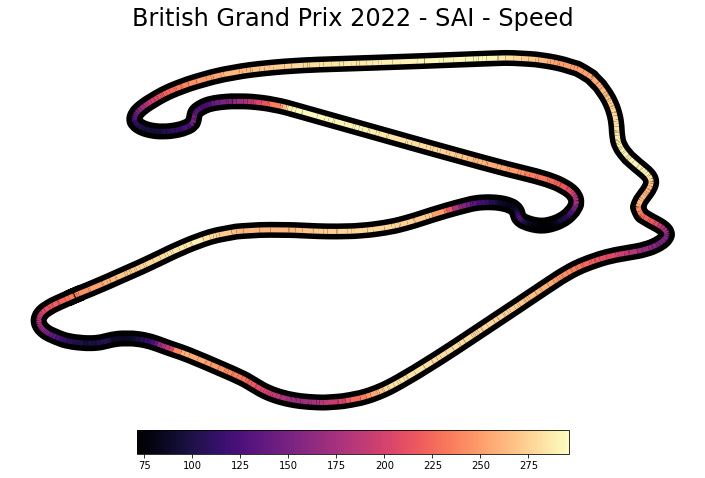

In [112]:
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")


# Show the plot
plt.show()
